In [1]:
#Bibliotecas que voy a usar# 
import pandas as pd

In [114]:
#importar tabla 
#path = 'C:/Users/WINDOWS 8.1/Desktop/maca/trabajo_final_alga-aras/tabla_trabajo_final.csv' 
path = 'C:/Users/maca2/OneDrive/Documentos/Github/trabajo_final_alga-aras/tabla_trabajo_final.csv'
sparks_data_list= pd.read_csv(path,sep=',') #tabla incorporada como dataframe y el archivo original cada columna separada por coma
del sparks_data_list['Unnamed: 0'] #borrar la columna 0
sparks_data_list.head()#mstrar las primeras filas de la tabla
print(sparks_data_list)

      tiempo_maximo  intensidad_maxima  intensidad_minima  tiempo_valle   
0              13.0          10.925926           7.740741          23.0  \
1               4.0          10.941176           8.117647           7.0   
2               3.0           7.230769           6.884615           4.0   
3              15.0          10.363636           7.454545           0.0   
4              24.0          10.689655           7.931034          26.0   
...             ...                ...                ...           ...   
2392            9.0           5.241379           4.551724          13.0   
2393            8.0           5.526316           4.684211          10.0   
2394            3.0           5.700000           4.200000          10.0   
2395           18.0          29.888889          25.388889           2.0   
2396           22.0           6.268293           4.707317          23.0   

      intensidad_valle  sparks_amplitud   TTP  sparks_tiempo_pico50   
0             7.666667      

### Registrar medidas caracteristicas

In [115]:
df=sparks_data_list
print(df)

      tiempo_maximo  intensidad_maxima  intensidad_minima  tiempo_valle   
0              13.0          10.925926           7.740741          23.0  \
1               4.0          10.941176           8.117647           7.0   
2               3.0           7.230769           6.884615           4.0   
3              15.0          10.363636           7.454545           0.0   
4              24.0          10.689655           7.931034          26.0   
...             ...                ...                ...           ...   
2392            9.0           5.241379           4.551724          13.0   
2393            8.0           5.526316           4.684211          10.0   
2394            3.0           5.700000           4.200000          10.0   
2395           18.0          29.888889          25.388889           2.0   
2396           22.0           6.268293           4.707317          23.0   

      intensidad_valle  sparks_amplitud   TTP  sparks_tiempo_pico50   
0             7.666667      

In [6]:
df.describe() # para obtenr medidas caracteristicas de cada ditribucion

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2069.000000,2336.000000,2336.000000,2336.000000,2336.000000,2397.000000,2397.000000,2397.00000
mean,8.585616,16.546522,13.009426,10.145120,13.905734,0.307328,4.600599,7.418224,29.337625,3.433206,6.950771,0.090817,6.160103,14.815603,18.597413,1.53567
std,6.284302,15.008828,11.534076,6.351037,12.145036,0.803676,4.526220,21.870741,128.084665,21.580814,10.210784,0.107791,5.520145,6.206602,18.520580,0.49883
min,1.000000,2.636364,2.125000,0.000000,2.111111,-0.040698,1.000000,-47.481535,-4608.037502,-69.481535,-166.000000,-0.020349,-24.000000,4.000000,5.000000,1.00000
25%,4.000000,6.117647,5.482069,6.000000,5.571429,0.091938,1.000000,2.655810,8.907313,0.521316,3.000000,0.026786,3.000000,10.000000,11.000000,1.00000
50%,7.000000,7.732143,6.312500,9.000000,6.753378,0.154744,3.000000,5.372176,16.305071,1.379049,6.000000,0.056499,5.000000,14.000000,15.000000,2.00000
75%,12.000000,23.377404,18.333333,13.000000,19.620629,0.263229,7.000000,9.016228,32.808022,3.353218,9.000000,0.111471,9.000000,18.000000,20.000000,2.00000
max,48.000000,124.300000,98.600000,50.000000,98.666667,16.129630,43.000000,785.487402,1624.952729,783.487402,115.000000,1.008814,44.000000,56.000000,506.000000,2.00000


In [116]:
import pandas as pd
import numpy as np

# Crear un DataFrame vacío para almacenar los datos eliminados
datos_eliminados = pd.DataFrame(columns=['Index', 'Flag'])

# Eliminar filas con más de 8 valores NaN y almacenar los datos eliminados
for index, row in df.iterrows():
    if row.isnull().sum() > 8:
        datos_eliminados = pd.concat([datos_eliminados, pd.DataFrame({'Index': [index], 'Flag': [row['flag']]})], ignore_index=True)
        df.drop(index, inplace=True)

# Imprimir el DataFrame con los datos eliminados
print("Datos eliminados:")
print(datos_eliminados)

# Contar la cantidad de veces que el valor de la columna 'flag' fue 1 y 2
conteo_flag = datos_eliminados['Flag'].value_counts()

# Imprimir el conteo de valores de 'flag'
print("Cantidad de veces que 'flag' fue 1:", conteo_flag[1])
print("Cantidad de veces que 'flag' fue 2:", conteo_flag[2])

# Recorrer la tabla por columna y reemplazar los valores NaN por la media de la población correspondiente
for columna in df.columns:
    if columna == 'flag':
        continue
    media_poblacion1 = df.loc[df['flag'] == 1, columna].mean()
    media_poblacion2 = df.loc[df['flag'] == 2, columna].mean()
    df.loc[(df['flag'] == 1) & (df[columna].isnull()), columna] = media_poblacion1
    df.loc[(df['flag'] == 2) & (df[columna].isnull()), columna] = media_poblacion2



Datos eliminados:
   Index  Flag
0     50   1.0
1    112   1.0
2    183   2.0
3    213   1.0
4    218   2.0
..   ...   ...
56  2316   1.0
57  2320   1.0
58  2342   1.0
59  2376   2.0
60  2380   2.0

[61 rows x 2 columns]
Cantidad de veces que 'flag' fue 1: 23
Cantidad de veces que 'flag' fue 2: 38


In [117]:
# Crear un DataFrame vacío para almacenar los datos eliminados
tiempos_eliminados = pd.DataFrame(columns=['Index', 'Flag'])

# Eliminar filas de las columnas de tiempo que tengan valores menores a cero, por que el tiempo no puede ser negativo
#variableparachequear= row['tiempo_maximo'] 
#variableparachequear= row['tiempo_valle']
#variableparachequear= row['TTP']
#variableparachequear= row['sparks_tiempo_pico50']
variableparachequear= row['TTP50']
for index, row in df.iterrows():
    if row['tiempo_maximo'] < 0 or row['tiempo_valle'] < 0 or row['TTP'] < 0 or row['sparks_tiempo_pico50'] < 0 or row['TTP50']<0:
        tiempos_eliminados = pd.concat([tiempos_eliminados, pd.DataFrame({'Index': [index], 'Flag': [row['flag']]})], ignore_index=True)
        df.drop(index, inplace=True)

# Imprimir el DataFrame con los datos eliminados
print("Datos eliminados:")
print(tiempos_eliminados)

# Contar la cantidad de veces que el valor de la columna 'flag' fue 1 y 2
conteo_flag = tiempos_eliminados['Flag'].value_counts()

# Imprimir el conteo de valores de 'flag'
print("Cantidad de veces que 'flag' fue 1:", conteo_flag[1])
print("Cantidad de veces que 'flag' fue 2:", conteo_flag[2])


Datos eliminados:
   Index  Flag
0    153   2.0
1    163   1.0
2    178   2.0
3    253   1.0
4    457   1.0
5    527   2.0
6    739   1.0
7    910   1.0
8    930   1.0
9    934   2.0
10  1042   1.0
11  1122   1.0
12  1185   1.0
13  1226   2.0
14  1332   2.0
15  1450   2.0
16  1452   1.0
17  1482   1.0
18  1499   1.0
19  1534   2.0
20  1543   2.0
21  1558   2.0
22  1600   1.0
23  1771   1.0
24  1821   1.0
25  1994   1.0
26  2037   1.0
27  2046   2.0
28  2107   2.0
29  2119   2.0
30  2142   1.0
31  2158   1.0
32  2197   2.0
33  2244   2.0
Cantidad de veces que 'flag' fue 1: 19
Cantidad de veces que 'flag' fue 2: 15


### Representar frecuencia de variable y distribucion

In [118]:
# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Inicializar el dataframe de resultados
resultados = pd.DataFrame(columns=['Columna', 'Mediana_1', 'Mediana_2', 'Moda_1', 'Moda_2', 'Percentil_25_1', 'Percentil_25_2',
                                   'Percentil_75_1', 'Percentil_75_2', 'Rango_1', 'Rango_2', 'Intercuartil_1', 'Intercuartil_2',
                                   'DesviacionMedia_1', 'DesviacionMedia_2', 'Varianza_1', 'Varianza_2', 'DesviacionTipica_1',
                                   'DesviacionTipica_2', 'CoeficienteVariacion_1', 'CoeficienteVariacion_2'])

# Paso 3: Calcular las estadísticas descriptivas para cada población de cada columna
for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"

    # Calcular estadísticas para la población 1
    mediana_1 = poblacion1[columna].median()
    moda_1 = poblacion1[columna].mode().values[0] if not poblacion1[columna].mode().empty else np.nan
    percentil_25_1 = poblacion1[columna].quantile(0.25)
    percentil_75_1 = poblacion1[columna].quantile(0.75)
    rango_1 = poblacion1[columna].max() - poblacion1[columna].min()
    intercuartil_1 = percentil_75_1 - percentil_25_1
    desviacion_media_1 = np.mean(np.abs(poblacion1[columna] - mediana_1))
    varianza_1 = poblacion1[columna].var()
    desviacion_tipica_1 = poblacion1[columna].std()
    coef_variacion_1 = desviacion_tipica_1 / mediana_1

    # Calcular estadísticas para la población 2
    mediana_2 = poblacion2[columna].median()
    moda_2 = poblacion2[columna].mode().values[0] if not poblacion2[columna].mode().empty else np.nan
    percentil_25_2 = poblacion2[columna].quantile(0.25)
    percentil_75_2 = poblacion2[columna].quantile(0.75)
    rango_2 = poblacion2[columna].max() - poblacion2[columna].min()
    intercuartil_2 = percentil_75_2 - percentil_25_2
    desviacion_media_2 = np.mean(np.abs(poblacion2[columna] - mediana_2))
    varianza_2 = poblacion2[columna].var()
    desviacion_tipica_2 = poblacion2[columna].std()
    coef_variacion_2 = desviacion_tipica_2 / mediana_2

    # Agregar las estadísticas al dataframe de resultados
    resultados.loc[len(resultados)] = [columna, mediana_1, mediana_2, moda_1, moda_2, percentil_25_1, percentil_25_2,
                                       percentil_75_1, percentil_75_2, rango_1, rango_2, intercuartil_1, intercuartil_2,
                                       desviacion_media_1, desviacion_media_2, varianza_1, varianza_2,
                                       desviacion_tipica_1, desviacion_tipica_2, coef_variacion_1, coef_variacion_2]

# Imprimir los resultados
print(resultados)


                 Columna  Mediana_1  Mediana_2     Moda_1     Moda_2   
0          tiempo_maximo   8.000000   6.000000   4.000000   4.000000  \
1      intensidad_maxima   6.750000  10.545455   6.000000   5.000000   
2      intensidad_minima   5.944444   6.864198   5.666667   5.500000   
3           tiempo_valle  10.000000   8.000000   7.000000   6.000000   
4       intensidad_valle   6.100000   8.115385   6.000000   6.000000   
5        sparks_amplitud   0.130952   0.174757   0.090909   0.333333   
6                    TTP   3.000000   3.000000   1.000000   1.000000   
7   sparks_tiempo_pico50   6.073387   4.764836   2.509692   0.515968   
8                 sp_tau  20.475275  17.202850  35.392497  24.024503   
9                  TTP50   1.636643   1.328149   0.509692   0.514431   
10             fullWidth   6.000000   5.000000   2.000000   2.000000   
11         (ΔF/F0)/ΔTmax   0.049689   0.068702   0.021505   0.083333   
12          fullDuration   6.000000   5.000000   2.000000   2.00

In [119]:
# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Inicializar el dataframe de resultados
resultados = pd.DataFrame(columns=['Columna', 'Media_1', 'Media_2', 'DesviacionEstandar_1', 'DesviacionEstandar_2'])

# Paso 3: Calcular las estadísticas descriptivas para cada población de cada columna
for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"

    # Calcular estadísticas para la población 1
    media_1 = poblacion1[columna].mean()
    desviacion_estandar_1 = poblacion1[columna].std()

    # Calcular estadísticas para la población 2
    media_2 = poblacion2[columna].mean()
    desviacion_estandar_2 = poblacion2[columna].std()

    # Agregar las estadísticas al dataframe de resultados
    resultados.loc[len(resultados)] = [columna,media_1, media_2, desviacion_estandar_1, desviacion_estandar_2]

# Imprimir los resultados
print(resultados)


                 Columna    Media_1    Media_2  DesviacionEstandar_1   
0          tiempo_maximo   8.887021   8.043054              5.573915  \
1      intensidad_maxima  15.622176  17.560239             13.996912   
2      intensidad_minima  12.488130  13.602208             10.810244   
3           tiempo_valle  10.500467   9.724614              5.657329   
4       intensidad_valle  13.284357  14.600924             11.267423   
5        sparks_amplitud   0.255990   0.357957              0.518368   
6                    TTP   4.632120   4.344435              4.102775   
7   sparks_tiempo_pico50   8.698283   6.690743             30.705138   
8                 sp_tau  35.139478  23.905287             89.620693   
9                  TTP50   4.443381   2.992124             30.609313   
10             fullWidth   6.745098   7.148660              6.586833   
11         (ΔF/F0)/ΔTmax   0.072677   0.108890              0.076756   
12          fullDuration   6.245565   6.025995              5.31

In [120]:
import scipy.stats as stats
from scipy.stats import normaltest

In [121]:
#### con test de normalidad ###

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Realizar el test de distribución para cada columna
resultados = {}

for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    
    # Obtener los datos de la columna para cada población
    datos_poblacion1 = poblacion1[columna]
    datos_poblacion2 = poblacion2[columna]
    
    # Realizar el test de normalidad para cada población
    _, p_valor_poblacion1 = stats.normaltest(datos_poblacion1)
    _, p_valor_poblacion2 = stats.normaltest(datos_poblacion2)
    
    # Determinar si sigue una distribución normal
    sigue_normal_poblacion1 = p_valor_poblacion1 > 0.05
    sigue_normal_poblacion2 = p_valor_poblacion2 > 0.05
    
    # Almacenar los resultados del test de distribución para cada columna
    resultados[columna] = {'p_valor_poblacion1': p_valor_poblacion1, 'p_valor_poblacion2': p_valor_poblacion2,
                           'sigue_normal_poblacion1': sigue_normal_poblacion1, 'sigue_normal_poblacion2': sigue_normal_poblacion2}

# Paso 3: Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Imprimir los resultados
print(resultados_df)


                        tiempo_maximo intensidad_maxima intensidad_minima   
p_valor_poblacion1                0.0               0.0               0.0  \
p_valor_poblacion2                0.0               0.0               0.0   
sigue_normal_poblacion1         False             False             False   
sigue_normal_poblacion2         False             False             False   

                        tiempo_valle intensidad_valle sparks_amplitud    TTP   
p_valor_poblacion1               0.0              0.0             0.0    0.0  \
p_valor_poblacion2               0.0              0.0             0.0    0.0   
sigue_normal_poblacion1        False            False           False  False   
sigue_normal_poblacion2        False            False           False  False   

                        sparks_tiempo_pico50 sp_tau  TTP50 fullWidth   
p_valor_poblacion1                       0.0    0.0    0.0       0.0  \
p_valor_poblacion2                       0.0    0.0    0.0       0.0 

In [122]:
### con test de saphiro###

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Realizar el test de distribución para cada columna y determinar si sigue una distribución normal
resultados = {}

for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    
    # Obtener los datos de la columna para cada población
    datos_poblacion1 = poblacion1[columna]
    datos_poblacion2 = poblacion2[columna]
    
    # Realizar el test de normalidad para cada población
    _, p_valor_poblacion1 = stats.shapiro(datos_poblacion1)
    _, p_valor_poblacion2 = stats.shapiro(datos_poblacion2)
    
    # Determinar si sigue una distribución normal
    sigue_normal_poblacion1 = p_valor_poblacion1 > 0.05
    sigue_normal_poblacion2 = p_valor_poblacion2 > 0.05
    
    # Almacenar los resultados del test de distribución para cada columna
    resultados[columna] = {'p_valor_poblacion1': p_valor_poblacion1, 'p_valor_poblacion2': p_valor_poblacion2,
                           'sigue_normal_poblacion1': sigue_normal_poblacion1, 'sigue_normal_poblacion2': sigue_normal_poblacion2}

# Paso 3: Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Imprimir los resultados
print(resultados_df)


                        tiempo_maximo intensidad_maxima intensidad_minima   
p_valor_poblacion1                0.0               0.0               0.0  \
p_valor_poblacion2                0.0               0.0               0.0   
sigue_normal_poblacion1         False             False             False   
sigue_normal_poblacion2         False             False             False   

                        tiempo_valle intensidad_valle sparks_amplitud    TTP   
p_valor_poblacion1               0.0              0.0             0.0    0.0  \
p_valor_poblacion2               0.0              0.0             0.0    0.0   
sigue_normal_poblacion1        False            False           False  False   
sigue_normal_poblacion2        False            False           False  False   

                        sparks_tiempo_pico50 sp_tau  TTP50 fullWidth   
p_valor_poblacion1                       0.0    0.0    0.0       0.0  \
p_valor_poblacion2                       0.0    0.0    0.0       0.0 

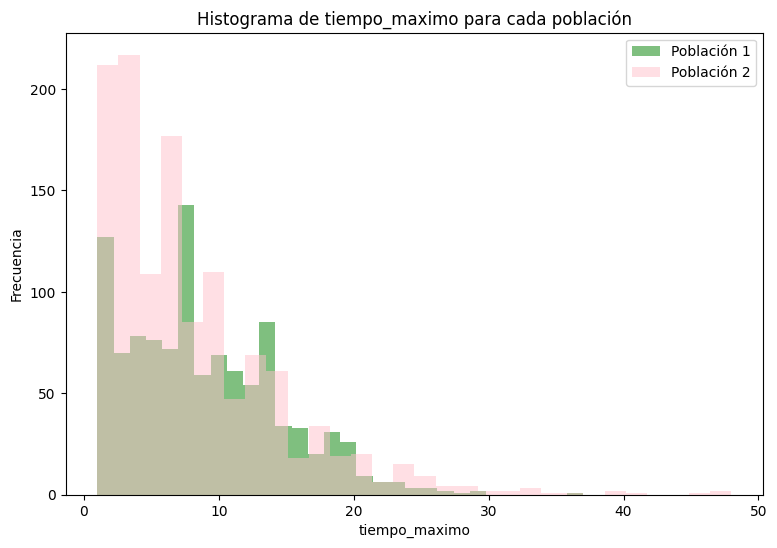

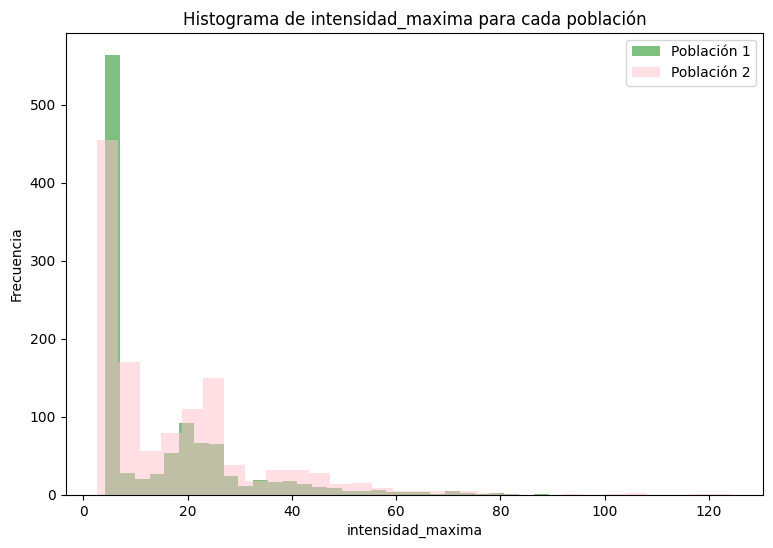

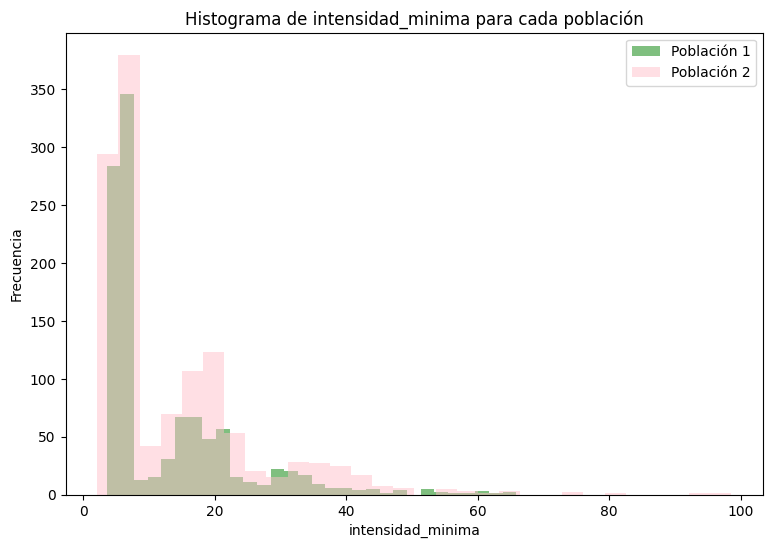

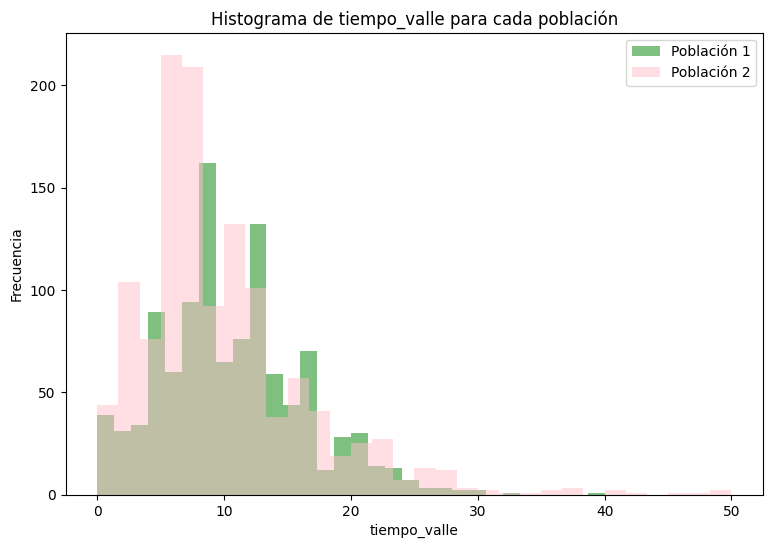

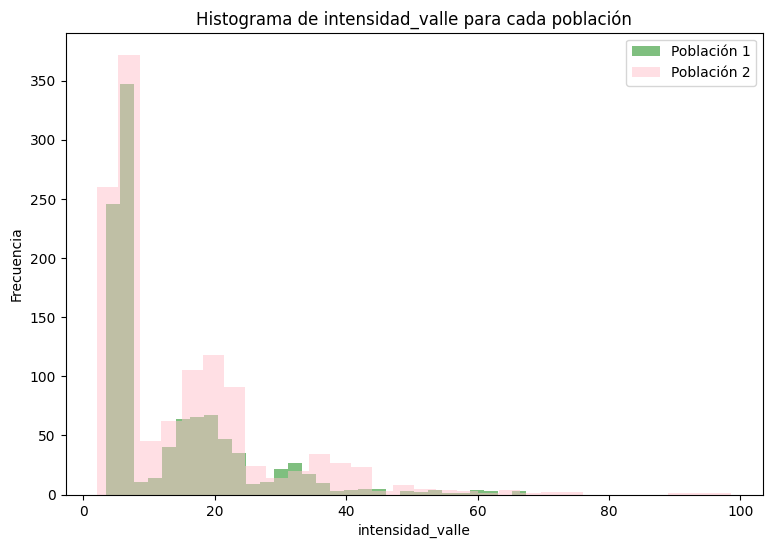

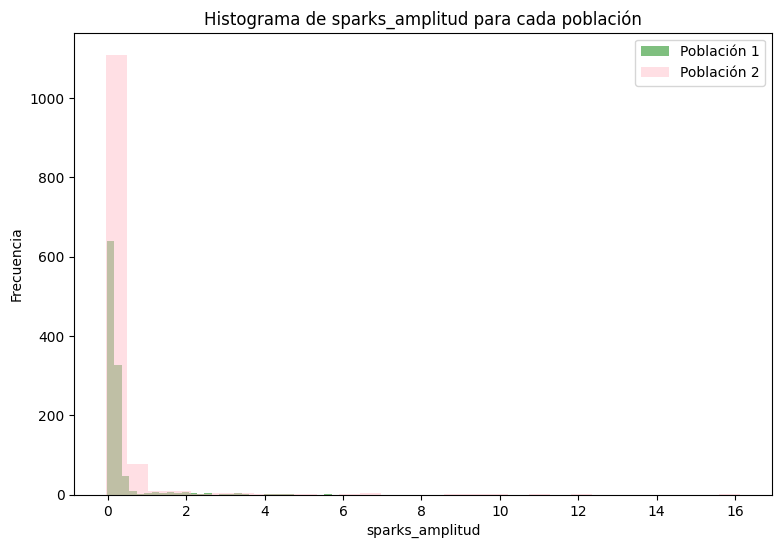

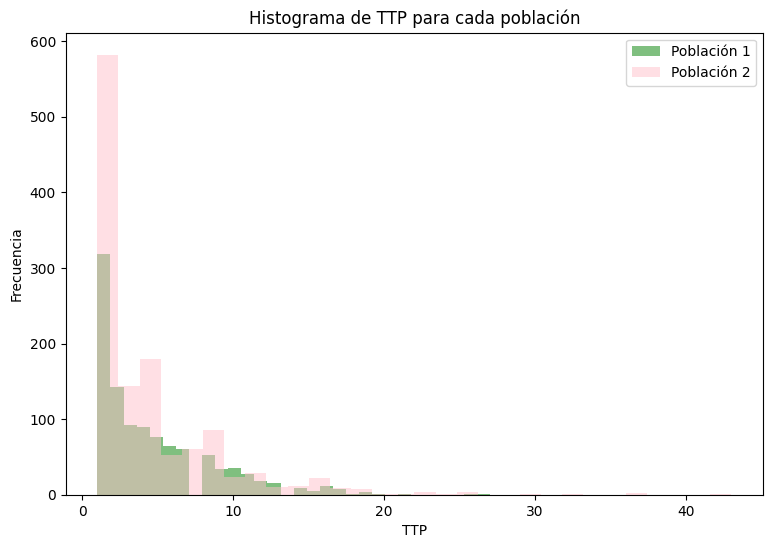

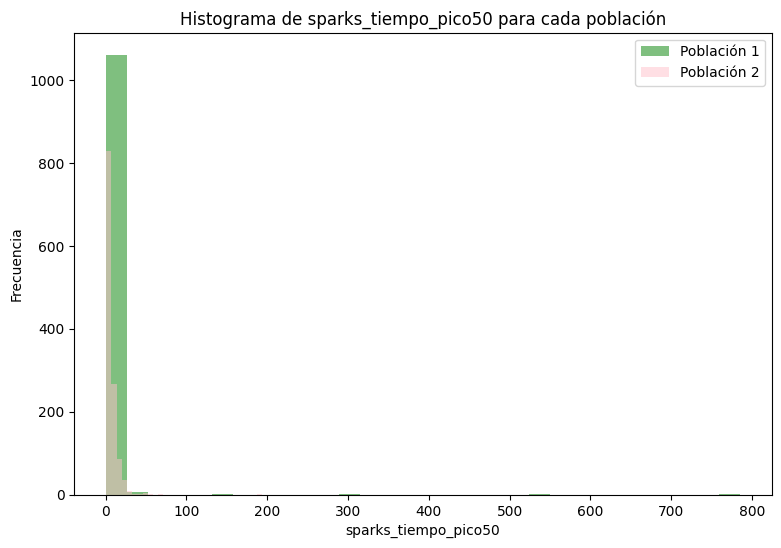

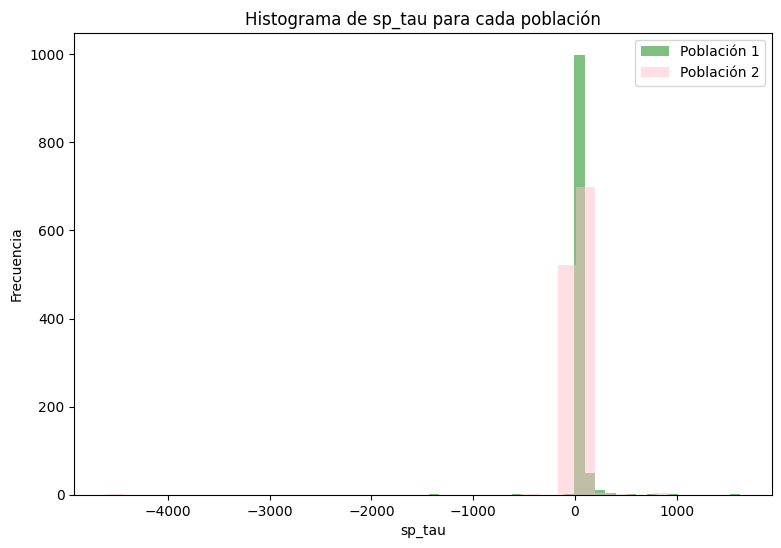

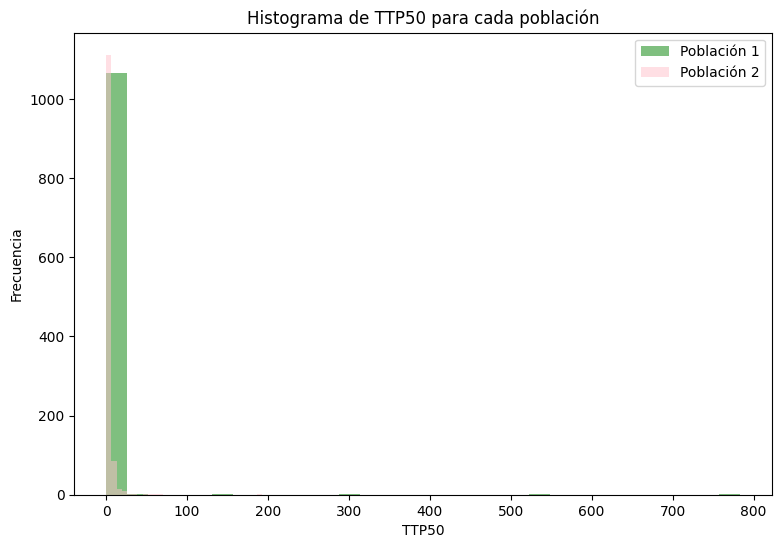

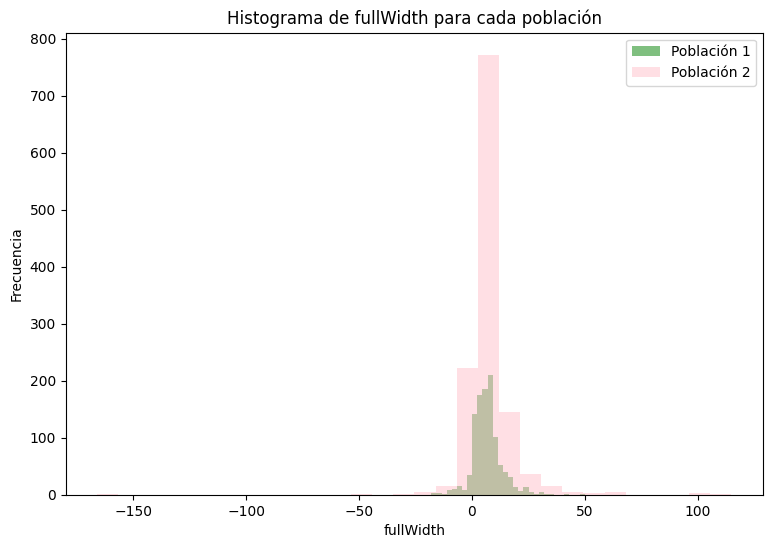

FileNotFoundError: [Errno 2] No such file or directory: '(ΔF/F0)/ΔTmax_hist.png'

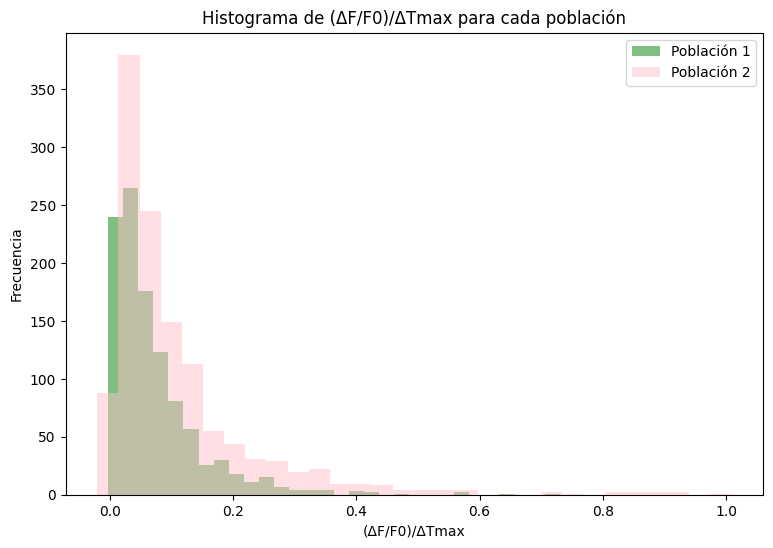

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Generar histogramas separados por población para cada columna
for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    
    plt.figure(figsize=(9, 6))
    plt.hist(poblacion1[columna], bins=30, alpha=0.5, label='Población 1', color='green')
    plt.hist(poblacion2[columna], bins=30, alpha=0.5, label='Población 2', color='pink')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {columna} para cada población')
    plt.legend()
    plt.savefig(f'{columna}_hist')  # Guardar imagen del histograma
    plt.show()

#df.hist(bins=30, figsize=(9,9)) #obtener histograma para ver la distribucion de cada una de las variables
#pl.suptitle("Histogram for each numeric input variable")#titulo de los graficos
#plt.savefig('fruits_hist') #para guardar imagenes de los graficos
#plt.show()#mostrar los graficos

### Calcular intervalo de confianza

In [124]:
# Calcular los intervalos de confianza para la media de cada columna
confidence_level = 0.95
confidence_intervals = {}

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    #intervalo para poblacion 1
    mean1 = np.mean(poblacion1)
    n1 = len(poblacion1)
    std_error1 = np.std(poblacion1, ddof=1) / np.sqrt(n1)
    margin_of_error1 = std_error1 * stats.t.ppf((1 + confidence_level) / 2, n1 - 1)
    confidence_interval_1 = (mean1 - margin_of_error1, mean1 + margin_of_error1)


    #intervalo para poblacion 2
    mean2 = np.mean(poblacion2)
    n2 = len(poblacion2)
    std_error2 = np.std(poblacion2, ddof=1) / np.sqrt(n2)
    margin_of_error2 = std_error2 * stats.t.ppf((1 + confidence_level) / 2, n2 - 1)
    confidence_interval_2 = (mean2 - margin_of_error2, mean2 + margin_of_error2)

# Almacenar los intervalos de confianza en el diccionario
    confidence_intervals[columna] = {'Poblacion 1': confidence_interval_poblacion1,
                                     'Poblacion 2': confidence_interval_poblacion2}

# Imprimir los intervalos de confianza
for columna, intervals in confidence_intervals.items():
    print(f'Columna: {columna}')
    print(f'Poblacion 1: {intervals["Poblacion 1"]}')
    print(f'Poblacion 2: {intervals["Poblacion 2"]}')
    print()


Columna: tiempo_maximo
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: intensidad_maxima
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: intensidad_minima
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: tiempo_valle
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: intensidad_valle
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: sparks_amplitud
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: TTP
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: sparks_tiempo_pico50
Poblacion 1: (17.16773947335639, 18.160700893616088)
Pobla

### Determinar tamaño de muestra

In [125]:
import math
import pandas as pd
from statsmodels.stats.power import TTestIndPower

In [126]:
tab = pd.DataFrame(df, index=['tiempo_maximo', 'intensidad_maxima', 'intensidad_minima', 
                               'tiempo_valle', 'intensidad_valle','sparks_amplitud','TTP',
                               'sparks_tiempo_pico50','sp_tau','TTP50','fullWidth','(ΔF/F0)/ΔTmax',
                               'fullDuration','width','high','flag'])

# Definir los parámetros
nivel_confianza = 0.95

# Crear una instancia de la clase TTestIndPower
ttp = TTestIndPower()

# Crear una lista para almacenar los tamaños muestrales
tamanios_muestrales = []

# Recorrer las columnas del DataFrame original
for columna in tab.columns:
    # Obtener los valores de la columna y la última columna (flag)
    valores = tab[columna]
    poblacion = tab['flag']
    
    # Filtrar los valores para cada población
    poblacion_1 = valores[poblacion == 1]
    poblacion_2 = valores[poblacion == 2]
    mean1 = np.mean(poblacion1)
    mean2 = np.mean(poblacion2)
    #margen de eror dentro de cada una diferencia de medias
    # Calcular el tamaño muestral para cada población utilizando statsmodels
    tamanio_muestral_1 = ttp.solve_power(effect_size= (abs(mean1-mean2))/ poblacion_1.std(),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')
    
    tamanio_muestral_2 = ttp.solve_power(effect_size=(abs(mean1-mean2))/ poblacion_2.std(),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')

    # Redondear al número entero más cercano---round()para redondear numeros
    #tamanio_muestral_1 = math.ceil(tamanio_muestral_1)
    #tamanio_muestral_2 = math.ceil(tamanio_muestral_2)
    
    # Agregar los tamaños muestrales a la lista
    tamanios_muestrales.append({'Columna': columna, 'Población 1': tamanio_muestral_1, 'Población 2': tamanio_muestral_2})

# Convertir la lista en un DataFrame
tammues = pd.DataFrame(tamanios_muestrales)

# Imprimir el DataFrame de resultados
print(tammues)

C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, Conve

                 Columna Población 1 Población 2
0          tiempo_maximo      [10.0]      [10.0]
1      intensidad_maxima      [10.0]      [10.0]
2      intensidad_minima      [10.0]      [10.0]
3           tiempo_valle      [10.0]      [10.0]
4       intensidad_valle      [10.0]      [10.0]
5        sparks_amplitud      [10.0]      [10.0]
6                    TTP      [10.0]      [10.0]
7   sparks_tiempo_pico50      [10.0]      [10.0]
8                 sp_tau      [10.0]      [10.0]
9                  TTP50      [10.0]      [10.0]
10             fullWidth      [10.0]      [10.0]
11         (ΔF/F0)/ΔTmax      [10.0]      [10.0]
12          fullDuration      [10.0]      [10.0]
13                 width      [10.0]      [10.0]
14                  high      [10.0]      [10.0]
15                  flag      [10.0]      [10.0]


C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, Conve

### Ensayo de hipotesis


Contrastes de hipótesis para dos o más poblaciones

lo que hice: estableci la poblacion por la flag determine que hiciera  la poblacion 1 la de flag 1 y poblacion 2 la de flag 2

In [127]:
### Las poblaciones no son normales asi que comparo pob1 y pob2 como tienen distinto tamaño tengo 
###que aplicar MANNWHITNEYU##

##Esta prueba es una alternativa no paramétrica al test t de Student y es adecuada para comparar dos muestras 
# independientes cuando no se cumplen los supuestos de normalidad y homogeneidad de varianzas.
#la prueba de Mann-Whitney U evalúa la hipótesis nula de que las dos poblaciones tienen distribuciones idénticas. 
# Si el valor p resultante es menor que el nivel de significancia deseado (por ejemplo, 0.05), se puede concluir 
# que hay evidencia estadística para rechazar la hipótesis nula y afirmar que hay diferencias significativas entre 
# las dos poblaciones en esa columna específica.

from scipy.stats import mannwhitneyu

# Create a list to store the results
results = []

# Iterate over each column of the DataFrame
for column in df.columns:
    # Filter the data for each population (flag 1 and flag 2)
    population1 = df[column][df['flag'] == 1]
    population2 = df[column][df['flag'] == 2]
    
    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(population1, population2)
    
    # Determine if there is a significant difference
    is_significant = p_value < 0.05
    
    # Add the results to the list
    results.append({'Column': column, 'Mann-Whitney U Statistic': statistic, 'p-value': p_value, 'Significant Difference': is_significant})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)



                  Column  Mann-Whitney U Statistic       p-value   
0          tiempo_maximo                  748858.5  1.628056e-08  \
1      intensidad_maxima                  600458.0  2.216825e-04   
2      intensidad_minima                  635653.0  1.387864e-01   
3           tiempo_valle                  749165.0  1.466337e-08   
4       intensidad_valle                  630459.0  7.078452e-02   
5        sparks_amplitud                  538131.0  2.715698e-14   
6                    TTP                  703325.5  4.721511e-03   
7   sparks_tiempo_pico50                  742079.5  1.885472e-07   
8                 sp_tau                  758788.0  3.807024e-10   
9                  TTP50                  681013.0  1.702983e-01   
10             fullWidth                  688420.5  6.540051e-02   
11         (ΔF/F0)/ΔTmax                  537844.5  2.362018e-14   
12          fullDuration                  707301.5  2.412854e-03   
13                 width                  814646

Análisis de dependencia de variables categóricas.

Esta relacionado el TTP on la amplitud del spark?

In [128]:
##Dependencia de variables categoricas con chi cuadrado
#sparks_amplitud, Intervalo de Confianza: (0.27513833727765064, 0.33951736698111895)
#TTP, Intervalo de Confianza: (4.419311283875328, 4.781887346261658)
## Análisis de dependencia de variables categóricas

import pandas as pd
import scipy.stats as ss

# Create the conditions using correct comparison operators
a = (df['TTP'] > 0.27) & (df['TTP'] < 0.33)
b = (df['sparks_amplitud'] > 4.41) & (df['sparks_amplitud'] < 4.79)

# Create a contingency table using groupby
contingency_table = df.groupby([a, b])['flag'].count()#.unstack(fill_value=0) #se supone que  con unstack me deberia dar una tabla de 2*2

# Perform the chi-square test
chi2, p_value, _, _ = ss.chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-Square Test Results:")
print(f"Chi2: {chi2}")
print(f"p-value: {p_value}")

# Perform the Fisher's exact test--->  poner aca por que no uso fisher y si chi cuadrado
#odds_ratio, fisher_p_value = ss.fisher_exact(contingency_table)

# Print the Fisher's exact test results
#print("Fisher's Exact Test Results:")
#print(f"Odds Ratio: {odds_ratio}")
#print(f"p-value: {fisher_p_value}")





Chi-Square Test Results:
Chi2: 0.0
p-value: 1.0


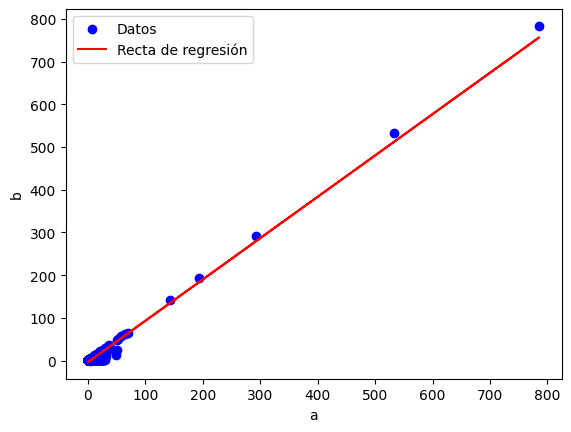

P-value: 0.0
Coeficiente de correlación: 0.9815989470349824


In [130]:
##Evaluar el ajuste de una recta de regresión e interpretar el coeficiente de correlación.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

a = df['sparks_tiempo_pico50'].values
b = df['TTP50'].values
slope, intercept, r_value, p_value, std_err = linregress(a, b)

plt.scatter(a, b, color='blue', label='Datos')
plt.plot(a, slope*a + intercept, color='red', label='Recta de regresión')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.show()
# Imprimir el p-value y el coeficiente de correlación
print("P-value:", p_value)
print("Coeficiente de correlación:", r_value)

##El coeficiente de correlación r_value varía entre -1 y 1.  
# Un valor cercano a 1 indica una correlación positiva fuerte, mientras que un  
# valor cercano a -1 indica una correlación negativa fuerte. Un valor cercano a
# 0 indica una correlación débil o nula.



In [72]:
que es tiempo al pico 50, es un dato numerico continuo, es un tiempo continuo

ademas de sacar los nan hay que sacar los tiempos negativos! 
es considerado valor errado, hay que eliminarlos por que estan mal calculados, hay que volver a medirlo por que esta mal medido ese parametro, o todo esta mal medido
como asumimos que esta todo bien medida voy a eliminar valores de tiempo que no tienen sentido

tengo que sacarle el tiempo negativo desde el inicio.
Lo que tendria q haber hecho era guardar la imagen y ver si era realmente un spark, sumamos que estan mal medidos los que estan en negativo
Eventos que tienen valores fuera de lo esperado lo sacamos del estudio



2       1.0
25      1.0
27      1.0
28      1.0
29      1.0
       ... 
2368    1.0
2374    1.0
2392    1.0
2394    1.0
2395    1.0
Name: flag, Length: 1090, dtype: float64


In [ ]:
tiemoi en que tarda en salir es el mismo para retoma en el caso de spark hay relacion entre un fenomeno y el otro, Reticulo sale y entra velocidad con la que sale guarda 
relacion con el tiemoo con la que cae la liberacion, el por que excede.


